# Modern Portföy Teorisi ve Doğrusal Programlama

Klasörümüzdeki tüm csv dosyalarını tek bir dataframe haline getirelim.

In [7]:
import pandas as pd
import os
from os import listdir
from os.path import isfile, join
import glob 

DATA_DIR = "B¦-ST100-2010.01.01-2020.07.01"
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join(DATA_DIR + "/*.csv"))))
df

,Date,Adj Close,Close,High,Low,Open,Volume
0,2010-01-01,12.787169,16.600000,16.60,16.60,16.600000,0.0
1,2010-01-04,12.864200,16.700001,16.90,16.60,16.799999,82273.0
2,2010-01-05,12.787169,16.600000,16.90,16.50,16.799999,266369.0
3,2010-01-06,12.941233,16.799999,16.90,16.40,16.500000,250455.0
4,2010-01-07,13.018263,16.900000,16.90,16.60,16.799999,140106.0
...,...,...,...,...,...,...,...
2655,2020-03-13,1.090000,1.090000,1.12,0.97,1.020000,30358379.0
2656,2020-03-16,1.000000,1.000000,1.05,0.99,1.050000,16521175.0
2657,2020-03-17,0.960000,0.960000,1.02,0.90,1.000000,21237180.0
2658,2020-03-18,0.970000,0.970000,0.99,0.92,0.940000,17157704.0


Klasörümüzden kayan yazı adlarını alalım. Ve hisse senedi adlarından .csv'yi kaldırın

In [8]:
ticker_names = [f for f in listdir('B¦-ST100-2010.01.01-2020.07.01/') if isfile(join('B¦-ST100-2010.01.01-2020.07.01/', f))]
ticker_names

# remove .csv from ticker names
ticker_names = [y.strip('.csv') for y in ticker_names]
ticker_names

['AEFES',
 'AGHOL',
 'AKBNK',
 'AKCNS',
 'AKGRT',
 'AKSA',
 'AKSEN',
 'ALARK',
 'ALBRK',
 'ALGYO',
 'ALKIM',
 'ANACM',
 'ARCLK',
 'ASELS',
 'AYGAZ',
 'BAGFS',
 'BIMAS',
 'BIZIM',
 'BRISA',
 'BRSAN',
 'BUCIM',
 'CCOLA',
 'CEMTS',
 'CIMSA',
 'CLEBI',
 'DEVA',
 'DOAS',
 'DOCO',
 'DOHOL',
 'ECILC',
 'EGEEN',
 'EKGYO',
 'ENJSA',
 'ENKAI',
 'EREGL',
 'FROTO',
 'GARAN',
 'GLYHO',
 'GOODY',
 'GOZDE',
 'GSDHO',
 'GUBRF',
 'GUSGR',
 'HALKB',
 'HEKTS',
 'HLGYO',
 'IPEKE',
 'ISCTR',
 'ISDMR',
 'ISFIN',
 'ISGYO',
 'ISMEN',
 'KAREL',
 'KARSN',
 'KARTN',
 'KCHOL',
 'KERVT',
 'KLMSN',
 'KORDS',
 'KOZAA',
 'KOZAL',
 'KRDMD',
 'LOGO',
 'MAVI',
 'MGROS',
 'MPARK',
 'NETAS',
 'NTHOL',
 'ODAS',
 'OTKAR',
 'OZKGY',
 'PETKM',
 'PGSUS',
 'SAHOL',
 'SASA',
 'SELEC',
 'SISE',
 'SKBNK',
 'SODA',
 'SOKM',
 'TATGD',
 'TAVHL',
 'TCELL',
 'THYAO',
 'TKFEN',
 'TMSN',
 'TOASO',
 'TRGYO',
 'TRKCM',
 'TSKB',
 'TTKOM',
 'TTRAK',
 'TUPRS',
 'ULKER',
 'VAKBN',
 'VESTL',
 'YATAS',
 'YKBNK',
 'ZOREN']

Klasördeki her hisse senedinin 'Kapat' sütununu alalım, hisse senetlerinin dosya adlarını sütunlarla eşleştirelim.

In [9]:
all_files = glob.glob(os.path.join(DATA_DIR + "/*.csv"))     # os.path.join kullanılması önerilir çünkü bu birleştirme işletim sistemini bağımsız kılar
df_from_each_file = (pd.read_csv(f , parse_dates=True, index_col="Date").assign(filename = f) for f in all_files)
concat = pd.concat(df_from_each_file, axis=1)
df = concat['Close']
df.columns = all_files
df

,B¦-ST100-2010.01.01-2020.07.01\AEFES.csv,B¦-ST100-2010.01.01-2020.07.01\AGHOL.csv,B¦-ST100-2010.01.01-2020.07.01\AKBNK.csv,B¦-ST100-2010.01.01-2020.07.01\AKCNS.csv,B¦-ST100-2010.01.01-2020.07.01\AKGRT.csv,B¦-ST100-2010.01.01-2020.07.01\AKSA.csv,B¦-ST100-2010.01.01-2020.07.01\AKSEN.csv,B¦-ST100-2010.01.01-2020.07.01\ALARK.csv,B¦-ST100-2010.01.01-2020.07.01\ALBRK.csv,B¦-ST100-2010.01.01-2020.07.01\ALGYO.csv,...,B¦-ST100-2010.01.01-2020.07.01\TSKB.csv,B¦-ST100-2010.01.01-2020.07.01\TTKOM.csv,B¦-ST100-2010.01.01-2020.07.01\TTRAK.csv,B¦-ST100-2010.01.01-2020.07.01\TUPRS.csv,B¦-ST100-2010.01.01-2020.07.01\ULKER.csv,B¦-ST100-2010.01.01-2020.07.01\VAKBN.csv,B¦-ST100-2010.01.01-2020.07.01\VESTL.csv,B¦-ST100-2010.01.01-2020.07.01\YATAS.csv,B¦-ST100-2010.01.01-2020.07.01\YKBNK.csv,B¦-ST100-2010.01.01-2020.07.01\ZOREN.csv
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,16.600000,9.55,6.17362,6.70,3.03029,1.50857,NaN,2.04459,1.19624,13.800000,...,0.39195,NaN,9.050000,29.750000,3.520000,4.24,2.52,0.52137,2.12539,2.06264
2010-01-04,16.700001,9.60,6.10931,6.55,3.03029,1.49714,NaN,2.05487,1.19624,13.700000,...,0.40290,4.58,9.050000,30.250000,3.580000,4.28,2.74,0.51254,2.08675,2.06264
2010-01-05,16.600000,9.70,6.17362,6.55,3.08857,1.50857,NaN,2.10624,1.24474,13.900000,...,0.40728,4.68,9.100000,31.500000,3.600000,4.42,2.70,0.51474,2.16403,2.08891
2010-01-06,16.799999,9.65,6.14147,6.65,3.08857,1.52000,NaN,2.22953,1.28246,14.200000,...,0.40290,4.88,9.500000,31.500000,3.740000,4.38,2.84,0.51695,2.20268,2.12833
2010-01-07,16.900000,9.90,6.14147,7.00,3.08857,1.49714,NaN,2.25008,1.30940,16.700001,...,0.40947,4.90,9.500000,31.500000,3.760000,4.36,2.90,0.52800,2.22844,2.15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-13,19.459999,13.15,6.43000,7.38,5.16000,6.80000,3.42,3.97000,1.16000,9.940000,...,0.96000,6.39,48.000000,85.599998,20.400000,4.89,9.90,5.61000,2.20000,1.09000
2020-03-16,17.680000,11.85,6.09000,6.67,4.65000,6.22000,3.07,3.62000,1.07000,9.330000,...,0.88000,5.80,44.099998,79.000000,18.430000,4.43,8.91,5.09000,2.03000,1.00000
2020-03-17,16.930000,11.45,6.07000,6.64,4.41000,5.94000,3.04,3.76000,1.04000,9.620000,...,0.93000,5.87,42.799999,72.900002,17.500000,4.62,9.10,4.97000,2.03000,0.96000


Sütun adlarını klasör yolları yerine kayan listemizle değiştirelim.

In [10]:
bist_100 = df
bist_100.columns = ticker_names
bist_100

,AEFES,AGHOL,AKBNK,AKCNS,AKGRT,AKSA,AKSEN,ALARK,ALBRK,ALGYO,...,TSKB,TTKOM,TTRAK,TUPRS,ULKER,VAKBN,VESTL,YATAS,YKBNK,ZOREN
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,16.600000,9.55,6.17362,6.70,3.03029,1.50857,NaN,2.04459,1.19624,13.800000,...,0.39195,NaN,9.050000,29.750000,3.520000,4.24,2.52,0.52137,2.12539,2.06264
2010-01-04,16.700001,9.60,6.10931,6.55,3.03029,1.49714,NaN,2.05487,1.19624,13.700000,...,0.40290,4.58,9.050000,30.250000,3.580000,4.28,2.74,0.51254,2.08675,2.06264
2010-01-05,16.600000,9.70,6.17362,6.55,3.08857,1.50857,NaN,2.10624,1.24474,13.900000,...,0.40728,4.68,9.100000,31.500000,3.600000,4.42,2.70,0.51474,2.16403,2.08891
2010-01-06,16.799999,9.65,6.14147,6.65,3.08857,1.52000,NaN,2.22953,1.28246,14.200000,...,0.40290,4.88,9.500000,31.500000,3.740000,4.38,2.84,0.51695,2.20268,2.12833
2010-01-07,16.900000,9.90,6.14147,7.00,3.08857,1.49714,NaN,2.25008,1.30940,16.700001,...,0.40947,4.90,9.500000,31.500000,3.760000,4.36,2.90,0.52800,2.22844,2.15460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-13,19.459999,13.15,6.43000,7.38,5.16000,6.80000,3.42,3.97000,1.16000,9.940000,...,0.96000,6.39,48.000000,85.599998,20.400000,4.89,9.90,5.61000,2.20000,1.09000
2020-03-16,17.680000,11.85,6.09000,6.67,4.65000,6.22000,3.07,3.62000,1.07000,9.330000,...,0.88000,5.80,44.099998,79.000000,18.430000,4.43,8.91,5.09000,2.03000,1.00000
2020-03-17,16.930000,11.45,6.07000,6.64,4.41000,5.94000,3.04,3.76000,1.04000,9.620000,...,0.93000,5.87,42.799999,72.900002,17.500000,4.62,9.10,4.97000,2.03000,0.96000


1000 günden az stokları eleyelim.

In [11]:
bist_100 = bist_100.drop(['SOKM', 'MPARK', 'ENJSA', 'MAVI', 'ISDMR'], axis = 1) 
bist_94 = bist_100

# Zaman dilimimizi 2018 ile 2020 arası belirleyelim.
bist_time_range = bist_94[(bist_94.index > '2018-01-01') & (bist_94.index <= '2020-01-01')]

# Günlük basit getirileri hesaplayın.
daily_simple_returns = bist_time_range.pct_change()
daily_simple_returns = daily_simple_returns.dropna()
daily_simple_returns

,AEFES,AGHOL,AKBNK,AKCNS,AKGRT,AKSA,AKSEN,ALARK,ALBRK,ALGYO,...,TSKB,TTKOM,TTRAK,TUPRS,ULKER,VAKBN,VESTL,YATAS,YKBNK,ZOREN
Date,,,,,,,,,,,,,,,,,,,,,
2018-01-03,0.024630,-0.010033,-0.014865,-0.005470,0.014970,0.036649,0.011933,-0.022568,-0.013068,0.035294,...,0.000000,-0.014063,-0.019029,-0.005691,0.030273,-0.025825,0.009081,-0.004286,-0.002257,-0.018634
2018-01-04,0.001603,0.019426,-0.010061,0.002750,0.000000,-0.004330,0.051887,-0.001444,-0.006624,-0.000946,...,-0.006848,0.006339,0.012709,-0.004088,0.044550,-0.001473,-0.002250,0.004305,-0.002262,0.018987
2018-01-05,0.012000,0.067937,0.021342,0.001828,0.035398,0.012320,-0.011211,0.014453,0.000000,0.010426,...,0.006895,0.006299,0.005284,0.008210,0.025408,0.002950,0.003382,-0.002858,0.009069,0.037267
2018-01-08,0.003953,0.011637,-0.010945,0.011861,0.025641,0.015747,0.024943,0.007121,0.019998,0.007504,...,0.000000,0.012520,0.039422,-0.002443,-0.013274,-0.011765,0.015730,-0.000716,-0.004494,-0.011976
2018-01-09,0.001575,-0.020705,-0.013079,-0.012624,-0.013889,-0.037351,-0.022124,0.001415,0.013075,-0.021415,...,-0.006848,-0.023184,-0.013906,-0.020408,0.000897,-0.016369,0.021018,-0.006452,-0.011286,-0.006061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-25,0.005240,-0.006730,0.001216,-0.007851,0.012090,-0.006637,0.007538,-0.005042,0.000000,-0.007127,...,0.017699,0.006812,0.003724,-0.000790,0.020105,-0.003868,0.019971,0.010249,-0.004082,-0.005747
2019-12-26,0.007819,-0.000565,0.004860,-0.010880,0.006826,0.016333,0.000000,0.015203,0.000000,-0.008280,...,0.008696,0.001353,0.007421,0.011067,0.008569,0.000000,-0.030769,-0.001449,0.004098,-0.017341
2019-12-27,0.008621,-0.001130,-0.004837,0.001000,0.001695,-0.006574,-0.027431,-0.003328,0.040816,-0.024502,...,0.000000,-0.008108,-0.000921,-0.001564,-0.018692,-0.003883,-0.058442,0.039187,-0.004082,-0.029412


In [12]:
#günlük getirilerini hesapla.
import numpy as np
log_returns= np.log(1 + daily_simple_returns)
log_returns_annual = log_returns.mean() * 260
sum_log_returns = log_returns_annual.sum()
print(str(round(sum_log_returns*100,2))+ '%')

740.64%


In [13]:
#ortalama maksimum getiriyi bulalım. aslında çok düşük. neredeyse %3,5
returns_mean = daily_simple_returns.mean()
max_return = returns_mean.max()
max_return

0.003432053720300675

In [14]:
#günlük ve yıllık kovaryansı hesaplayın. borsa istanbul'da genellikle bir yıl 260 gündür.
cov_daily = daily_simple_returns.cov()
cov_annual = cov_daily * 260

In [15]:
portfolio_returns = []
portfolio_volatility = []
sharpe_ratio = []
stock_weights = []

num_assets = 94
num_portfolios = 400

np.random.seed(101)

for single_portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    returns = np.dot(weights, log_returns_annual)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_annual, weights)))
    portfolios_variance = np.dot(weights.T, np.dot(cov_annual, weights))
    #risk_free_rate = 0.06
    #sharpe = returns - risk_free_rate / volatility
    sharpe = returns / volatility
    sharpe_ratio.append(sharpe)
    portfolio_returns.append(returns)
    portfolio_volatility.append(volatility)
    stock_weights.append(weights)

In [16]:
print('risk: %{}, Portföyün varyansı: {}% '  .format(round(volatility*100,3),round(portfolios_variance*100,3)))

risk: %19.71, Portföyün varyansı: 3.885% 


In [17]:
list_to_remove = ['SOKM', 'MPARK', 'ENJSA', 'MAVI', 'ISDMR']
ticker_names = list(set(ticker_names) - set(list_to_remove))

In [18]:
portfolios = {'Karlılık': portfolio_returns,
              'Volatilite': portfolio_volatility,
              'Sharpe Oranı': sharpe_ratio}

for counter, symbol in enumerate(ticker_names):
    portfolios[symbol+' weight'] = [weight[counter] for weight in stock_weights]

C:\Users\Serkan POLAT\AppData\Local\Temp\ipykernel_22488\1193692419.py:15: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-dark')


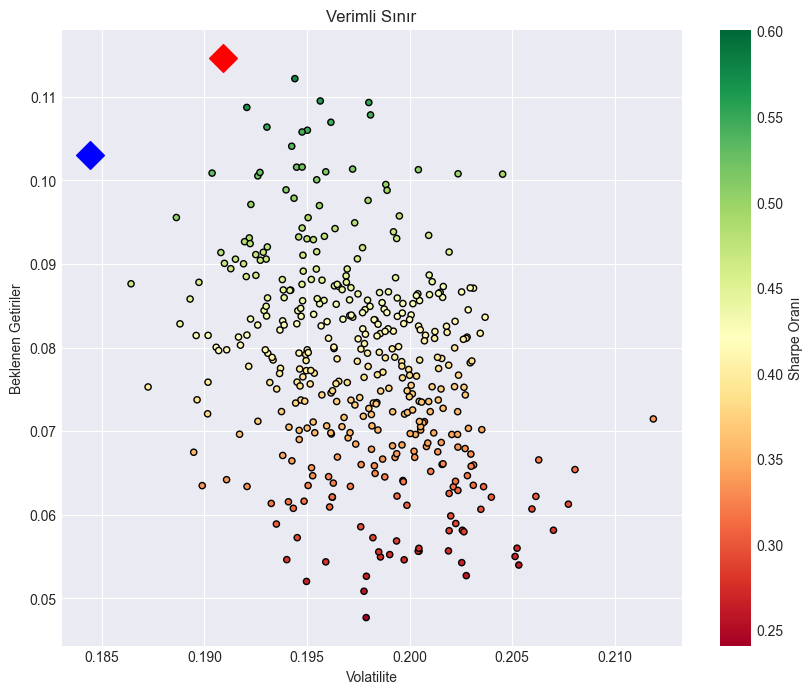

In [19]:
last_step = pd.DataFrame(portfolios)
column_order = ['Karlılık', 'Volatilite', 'Sharpe Oranı'] + [stock+' Weight' for stock in ticker_names]

import matplotlib.pyplot as plt
import seaborn

min_volatility = last_step['Volatilite'].min()
max_sharpe = last_step['Sharpe Oranı'].max()

# iki özel portföyü bulmak ve oluşturmak için minimum ve maksimum değerleri kullanın
min_variance_port = last_step.loc[last_step['Volatilite'] == min_volatility]
sharpe_portfolio = last_step.loc[last_step['Sharpe Oranı'] == max_sharpe]

# Dağılım grafiğiyle arsa sınırı, maksimum keskinlik ve minimum Volatilite değerleri
plt.style.use('seaborn-dark')
last_step.plot.scatter(x='Volatilite', y='Karlılık', c='Sharpe Oranı',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=sharpe_portfolio['Volatilite'], y=sharpe_portfolio['Karlılık'], c='red', marker='D', s=200)
plt.scatter(x=min_variance_port['Volatilite'], y=min_variance_port['Karlılık'], c='blue', marker='D', s=200 )
plt.xlabel('Volatilite')
plt.ylabel('Beklenen Getiriler')
plt.title('Verimli Sınır')
plt.show()

In [20]:
min_variance_port.T

,341
Karlılık,0.102995
Volatilite,0.184403
Sharpe Oranı,0.558532
AKCNS weight,0.006402
SISE weight,0.002417
...,...
DEVA weight,0.006356
TTRAK weight,0.001671
KERVT weight,0.018429
AKGRT weight,0.000014


In [21]:
sharpe_portfolio.T

,100
Karlılık,0.114699
Volatilite,0.190881
Sharpe Oranı,0.600893
AKCNS weight,0.006507
SISE weight,0.009251
...,...
DEVA weight,0.015572
TTRAK weight,0.019575
KERVT weight,0.000252
AKGRT weight,0.001358


In [22]:
max_sharpe

0.6008929984201642

In [23]:
sharpe_portfolio

,Karlılık,Volatilite,Sharpe Oranı,AKCNS weight,SISE weight,GOODY weight,KARTN weight,ASELS weight,KLMSN weight,TOASO weight,...,TKFEN weight,ISCTR weight,ISGYO weight,AKSEN weight,ALKIM weight,DEVA weight,TTRAK weight,KERVT weight,AKGRT weight,ISMEN weight
100,0.114699,0.190881,0.600893,0.006507,0.009251,0.003253,0.000255,0.012608,0.021192,0.016369,...,0.003065,0.010074,0.02333,0.022944,0.005293,0.015572,0.019575,0.000252,0.001358,0.000083


In [24]:
min_variance_port

,Karlılık,Volatilite,Sharpe Oranı,AKCNS weight,SISE weight,GOODY weight,KARTN weight,ASELS weight,KLMSN weight,TOASO weight,...,TKFEN weight,ISCTR weight,ISGYO weight,AKSEN weight,ALKIM weight,DEVA weight,TTRAK weight,KERVT weight,AKGRT weight,ISMEN weight
341,0.102995,0.184403,0.558532,0.006402,0.002417,0.003346,0.020194,0.011091,0.007504,0.00078,...,0.003124,0.020446,0.004123,0.022109,0.023488,0.006356,0.001671,0.018429,0.000014,0.005276


In [25]:
def portfolio_stats(weights, daily_simple_returns):
    
  # Bunun yerine listenin iletilmesi durumunda diziye dönüştürün.
    weights = np.array(weights)
    port_return = np.sum(daily_simple_returns.mean() * weights) * 260
    port_vol = np.sqrt(np.dot(weights.T, np.dot(daily_simple_returns.cov() * 260, weights)))
    sharpe = port_return/port_vol

    return {'karlılık': port_return, 'volatilite': port_vol, 'sharpe': sharpe}

In [26]:
# Minimizasyon
def minimize_sharpe(weights, daily_simple_returns):  
    return -portfolio_stats(weights,daily_simple_returns)['sharpe'] 

In [27]:
# Minimizasyon

def minimize_volatility(weights, daily_simple_returns):  
# olumsuz olanları dahil etmek istemiyoruz.
#Sharpe oranının aksine volatilitenin mutlak değerinin azalmasını istiyoruz.
    return portfolio_stats(weights,daily_simple_returns)['volatilite'] 

In [28]:
# Minimizasyon
def minimize_return(weights, daily_simple_returns): 
    return -portfolio_stats(weights,daily_simple_returns)['karlılık']

**Optimizasyon İşlevi**

Tüm paramızı bir varlığa veya fona yatırmak için kısıtlamalar tanımlarız.

Sınır değişkeni ile portföyümüzdeki bir varlığın %0 ile %100 arasında bir değer alacağını söylüyoruz.

Bir hisse senedi veya fon portföyümüzün çok büyük bir kısmını kapsıyorsa, yoğunlaşma riskini kullanmak çeşitlendirme kayıplarından kaçınmamıza yardımcı olur.

Bu limitleri örneğin; (0,0.3). Bu durumda tek bir pay portföyün en fazla %30'unu kapsayacaktır.

Son olarak başlatıcı ile optimizasyon algoritmasının başlangıç ​​ağırlıklarını ayarladık. Burada her hisse senedi portföyün eşit bir yüzdesini kapsayacak şekilde ayarlanır.

In [29]:
constraints = ({'type' : 'eq', 'fun': lambda x: np.sum(x) -1})
bounds = tuple((0,1) for x in range(num_assets))
initializer = num_assets * [1./num_assets,]

print (initializer)
print (bounds)

[0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.010638297872340425, 0.0106382

In [30]:
import scipy.optimize as optimize
optimal_sharpe=optimize.minimize(minimize_sharpe,
                                 initializer,
                                 args = (daily_simple_returns,),
                                 method = 'SLSQP',
                                 bounds = bounds,
                                 constraints = constraints)
print(optimal_sharpe)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -3.221387571768737
       x: [ 5.794e-15  7.586e-15 ...  1.097e-14  5.871e-15]
     nit: 17
     jac: [ 1.486e+00  2.833e+00 ...  2.951e+00  2.354e+00]
    nfev: 1632
    njev: 17


Son satırda başarı ile gördüğümüz x dizisi en iyi keskin oranı üreten portföy ağırlıklarını temsil etmektedir.

In [31]:
optimal_sharpe_weights=optimal_sharpe['x'].round(4)
list(zip(ticker_names,list(optimal_sharpe_weights)))

[('AKCNS', 0.0),
 ('SISE', 0.0),
 ('GOODY', 0.0),
 ('KARTN', 0.0),
 ('ASELS', 0.1092),
 ('KLMSN', 0.0),
 ('TOASO', 0.0),
 ('ZOREN', 0.0),
 ('SELEC', 0.0),
 ('LOGO', 0.0066),
 ('BIMAS', 0.0),
 ('ENKAI', 0.0),
 ('MGROS', 0.0),
 ('VESTL', 0.0),
 ('BRSAN', 0.0),
 ('PGSUS', 0.0),
 ('NTHOL', 0.0),
 ('GSDHO', 0.0),
 ('TAVHL', 0.0),
 ('GUBRF', 0.0),
 ('CEMTS', 0.0),
 ('GUSGR', 0.0),
 ('ARCLK', 0.0),
 ('BIZIM', 0.0),
 ('IPEKE', 0.1091),
 ('CLEBI', 0.0),
 ('AKSA', 0.0),
 ('ECILC', 0.2163),
 ('HALKB', 0.0262),
 ('KAREL', 0.0),
 ('TMSN', 0.0025),
 ('GARAN', 0.0),
 ('PETKM', 0.0),
 ('TCELL', 0.0),
 ('EKGYO', 0.0),
 ('BUCIM', 0.0),
 ('TRGYO', 0.0),
 ('TATGD', 0.0),
 ('AYGAZ', 0.0),
 ('EREGL', 0.0079),
 ('CCOLA', 0.0012),
 ('OTKAR', 0.0),
 ('AKBNK', 0.0),
 ('GLYHO', 0.1562),
 ('EGEEN', 0.0),
 ('KRDMD', 0.0),
 ('ODAS', 0.0),
 ('ALBRK', 0.0439),
 ('BAGFS', 0.0),
 ('THYAO', 0.1313),
 ('SASA', 0.0005),
 ('SODA', 0.0),
 ('ULKER', 0.0),
 ('AGHOL', 0.0),
 ('KCHOL', 0.0),
 ('DOAS', 0.0943),
 ('TRKCM', 0.0),


Portföy istatistikleri fonksiyonumuzu kullanarak performansımızı ölçelim. Keskin oranın negatifini en aza indirerek (keskinlik oranını maksimuma çıkararak) optimizasyon yaptık. Bu, keskinlik oranı için optimize edilmiş bir portföy oluşturur.

In [32]:
optimal_stats = portfolio_stats(optimal_sharpe_weights,daily_simple_returns)
print(optimal_stats)
print('Optimal Portföy Getirisi ', round(optimal_stats['karlılık']*100,4))
print('Optimal Portföy Volatilitesi: ', round(optimal_stats['volatilite']*100,4))
print('Optimal Portföy Sharpe Oranı: ', round(optimal_stats['sharpe'],4))

{'karlılık': 0.5324019937055058, 'volatilite': 0.1652710220395276, 'sharpe': 3.221387434623428}
Optimal Portföy Getirisi  53.2402
Optimal Portföy Volatilitesi:  16.5271
Optimal Portföy Sharpe Oranı:  3.2214
